This notebook will perform the same split-measure analysis as done in a previous notebook (*'Split measuring all valid audio files.ipynb'*). The virtual multi bat audio files were generated by randomly adding 2-3 single bat audio files of a duration matched with that of an actual multi bat audio file. The virtual multi bat audio files were generated in another notebook (*../Making virtual multi bat audio .ipynb*). 

This notebook will continue and apply the same logic and workflow as the previous split-measure notebook. This maintains consistency. The consistency is especially required because the acoustic properties of the virtual multi bat audio will be compared with the acoustic properties of the observed multi bat audio. 

- Author: Thejasvi Beleyur
- Date of initation: 2020-07-22



In [1]:
import glob
import datetime as dt
import sys
sys.path.append('/home/tbeleyur/Documents/packages_dev/correct_call_annotations/')
sys.path.append('../')
sys.path.append('../../individual_call_analysis/analysis/')

import correct_call_annotations.correct_call_annotations as cca
import format_and_clean
from format_and_clean import ind_call_format as icf
from measure_annot_audio import split_measure
from measure_annot_audio.inbuilt_measurement_functions import dB
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
import tqdm


In [2]:
%matplotlib notebook

print(f'Notebook started at: {dt.datetime.now()}')



Notebook started at: 2020-09-25 13:58:31.501053


In [3]:
audio_source_folder = '../virtual_multi_bat_audio/'
virtual_multibat_to_measure = glob.glob(audio_source_folder + '*.WAV')
virtual_multibat_to_measure

['../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-17_01_29_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-17_34_20_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-16_21502300_74_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-19_23_2_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-16_2324_31_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-17_45_162_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-16_21502300_18_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-16_2324_223_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-17_34_12_hp_singlebatmixed.WAV',
 '../virtual_multi_bat_audio/matching_annotaudio_Aditya_2018-08-17_34_51_hp_singlebatmixed.WAV',
 '../virtual_

In [4]:
all_measures = []

fs = 250000
kwargs = { 'inter_peak_difference':250, 
           'spectrum_smoothing_width': 100,
           'peak_range': 14,
           'fs':fs,
           'db_range':46,
           'overlap':0.5,
           'threshold':95,
           'nperseg':512,
           'fm_freqs_condition' : lambda X : X<98000,
           'non_signal_freqs_condition' : lambda X: X<70000
          
            }

for each in tqdm.tqdm(virtual_multibat_to_measure):

    measurements = split_measure.split_measure_audio(each,
                                  **kwargs)
    all_measures.append(measurements)


 26%|██▋       | 32/121 [00:19<00:40,  2.18it/s]../measure_annot_audio/inbuilt_measurement_functions.py:48: RuntimeWarning: divide by zero encountered in log10
  power_spectrum_audio = 20*np.log10(np.abs(np.fft.rfft(audio)))
100%|██████████| 121/121 [01:14<00:00,  1.63it/s]


In [5]:
all_virtual_splitmeasure = pd.concat(all_measures).reset_index(drop=True)


all_virtual_splitmeasure['unique_window_id'] = all_virtual_splitmeasure['segment_number'].astype(str) +'_'+all_virtual_splitmeasure['file_name'] 



In [6]:
all_virtual_splitmeasure

,value,segment_number,measurement,file_name,unique_window_id
0,0.032842,0,rms,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
1,0.123779,0,peak_amplitude,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
2,104480.000000,0,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
3,91308.593750,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
4,96191.406250,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
...,...,...,...,...,...
58787,109380.000000,91,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...
58788,109660.000000,91,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...
58789,109900.000000,91,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...
58790,87402.343750,91,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...


<IPython.core.display.Javascript object>


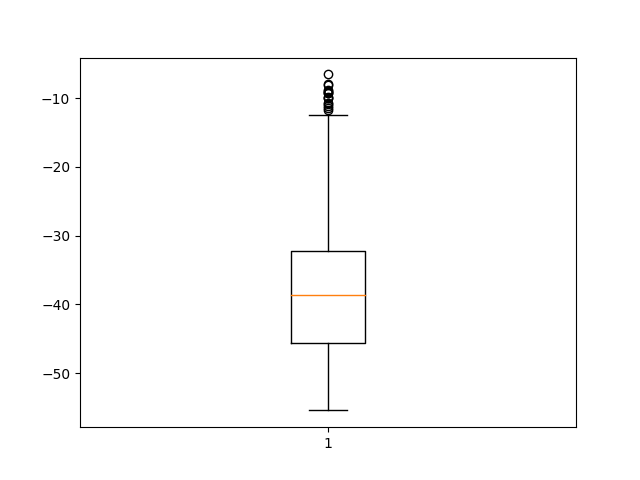

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a30c1c550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a30c1c780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a30c1c390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a30c4c208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a30c4cf28>],
 'means': []}

In [7]:
rms_values = all_virtual_splitmeasure[all_virtual_splitmeasure['measurement']=='rms']
plt.figure()
plt.boxplot(dB(rms_values['value']))



### Choosing only the louder audio segments

In [8]:
plus20dB_threshold = pd.read_csv('../call_threshold_levels.csv')
plus20dB_threshold

,Unnamed: 0,call_dbpeak_threshold,call_dbrms_threshold
0,0,-23.0,-37.0


In [9]:
# function copied from the original split measure notebook

def choose_all_windows_above_threshold(measurement_df, threshold):
    '''
    Chooses all windows with rms greater or equal to the given rms threshold
    
    
    Parameters
    ----------
    measurement_df : pd.DataFrame
        A long dataframe with one measurement value per row
        Must have the columns 'measurement', 'unique_window_id'
        The 'measurement' column must also have some entries with 'rms' in them. 
    threshold : float>0
        The rms threshold to define windows which are not silent. 
    
    Returns 
    -------
    all_above_threshold : pd.DataFrame
        The dataframe with all segments across different files that are greater than or equal to the 
        chosen threshold rms. 
    '''

    rms_values = measurement_df[measurement_df['measurement']=='rms'].reset_index(drop=True)
    above_threshold = rms_values[rms_values['value']>=threshold]
    windowids_above_threshold = above_threshold['unique_window_id']
    all_above_threshold = measurement_df[measurement_df['unique_window_id'].isin(windowids_above_threshold)].reset_index(drop=True)
    return all_above_threshold



In [10]:
threshold_20db = float(10**(plus20dB_threshold['call_dbrms_threshold']/20.0))

In [11]:
non_silent_measures = choose_all_windows_above_threshold(all_virtual_splitmeasure, threshold_20db)

<IPython.core.display.Javascript object>


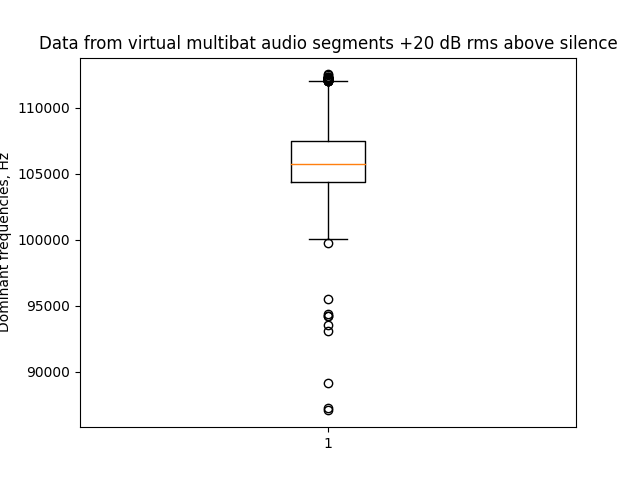

Text(0.5, 1.0, 'Data from virtual multibat audio segments +20 dB rms above silence')

In [12]:
dom_freq = non_silent_measures[non_silent_measures['measurement']=='dominant_frequencies']


plt.figure()
plt.boxplot(dom_freq['value']);
plt.ylabel('Dominant frequencies, Hz')
plt.title('Data from virtual multibat audio segments +20 dB rms above silence')

<IPython.core.display.Javascript object>


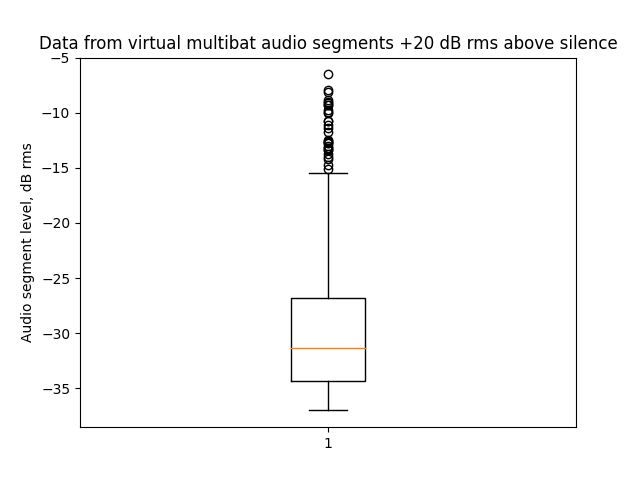

Text(0.5, 1.0, 'Data from virtual multibat audio segments +20 dB rms above silence')

In [13]:
rms_df = non_silent_measures[non_silent_measures['measurement']=='rms']

plt.figure()
plt.boxplot(dB(rms_df['value']))
plt.ylabel('Audio segment level, dB rms')
plt.title('Data from virtual multibat audio segments +20 dB rms above silence')


In [14]:
np.unique(non_silent_measures['measurement'])

array(['dominant_frequencies', 'fm_terminal_freqs', 'peak_amplitude',
       'rms'], dtype=object)

In [15]:
non_silent_measures

,value,segment_number,measurement,file_name,unique_window_id
0,0.032842,0,rms,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
1,0.123779,0,peak_amplitude,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
2,104480.000000,0,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
3,91308.593750,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
4,96191.406250,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
...,...,...,...,...,...
11215,109380.000000,91,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...
11216,109660.000000,91,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...
11217,109900.000000,91,dominant_frequencies,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...
11218,87402.343750,91,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...


<IPython.core.display.Javascript object>


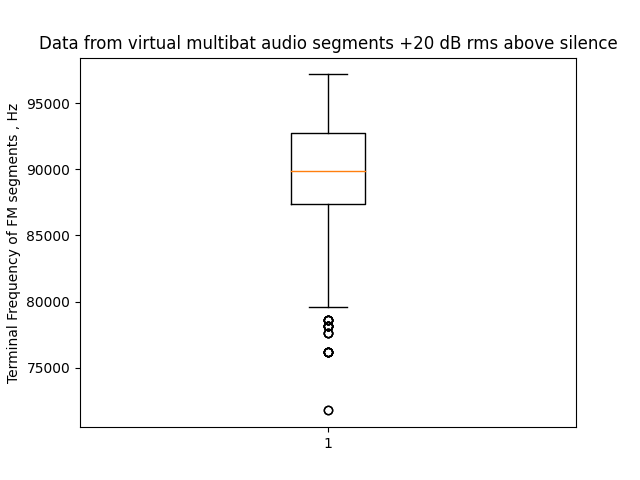

Text(0.5, 1.0, 'Data from virtual multibat audio segments +20 dB rms above silence')

In [16]:
lower_df = non_silent_measures[non_silent_measures['measurement']=='fm_terminal_freqs']

plt.figure()
plt.boxplot(lower_df['value'].dropna())
plt.ylabel('Terminal Frequency of FM segments , Hz')
plt.title('Data from virtual multibat audio segments +20 dB rms above silence')


In [17]:
lower_df

,value,segment_number,measurement,file_name,unique_window_id
3,91308.59375,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
4,96191.40625,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
5,83984.37500,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
6,85937.50000,0,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,0_matching_annotaudio_Aditya_2018-08-17_01_29_...
12,91308.59375,1,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_01_29_hp...,1_matching_annotaudio_Aditya_2018-08-17_01_29_...
...,...,...,...,...,...
11203,95703.12500,88,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_34_133_h...,88_matching_annotaudio_Aditya_2018-08-17_34_13...
11208,88867.18750,89,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_34_133_h...,89_matching_annotaudio_Aditya_2018-08-17_34_13...
11212,88378.90625,90,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_34_133_h...,90_matching_annotaudio_Aditya_2018-08-17_34_13...
11218,87402.34375,91,fm_terminal_freqs,matching_annotaudio_Aditya_2018-08-17_34_133_h...,91_matching_annotaudio_Aditya_2018-08-17_34_13...


<IPython.core.display.Javascript object>


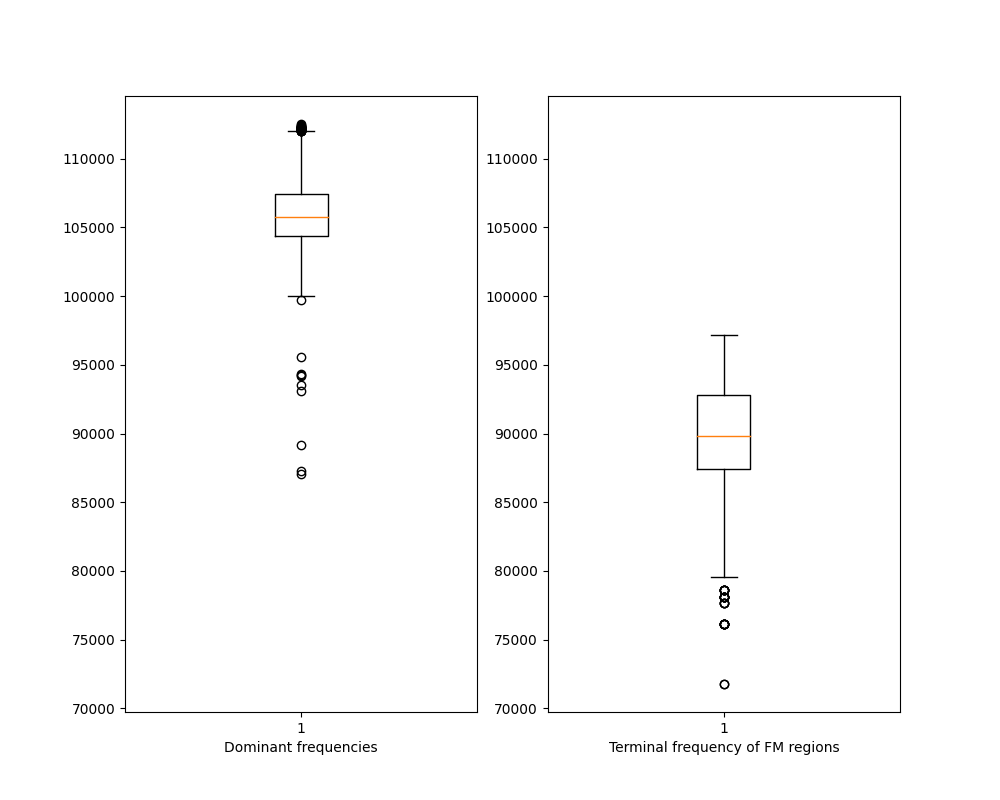

Text(0.5, 0, 'Terminal frequency of FM regions')

In [18]:
dom_freq = non_silent_measures[non_silent_measures['measurement']=='dominant_frequencies']
minusx_df = non_silent_measures[non_silent_measures['measurement']=='fm_terminal_freqs']

plt.figure(figsize=(10,8))
a0 = plt.subplot(121)
plt.boxplot(dom_freq['value'].dropna())
plt.xlabel('Dominant frequencies')
plt.subplot(122, sharey=a0)
plt.boxplot(minusx_df['value'].dropna())
plt.xlabel('Terminal frequency of FM regions')

In [19]:
non_silent_measures['video_annot_id'] = non_silent_measures['file_name'].str.lstrip('matching_annotaudio_')
# remove the '_hp' from the video_annot_ida

non_silent_measures['video_annot_id'] = non_silent_measures['video_annot_id'].str.rstrip('_hp_singlebatmixed.WAV')

In [20]:
video_annot_folder = '../../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
non_silent_measures['num_bats'] = icf.get_numbats_from_annotation_id(non_silent_measures['video_annot_id'], video_annot_folder)



In [21]:
group_size, counts = np.unique(non_silent_measures['num_bats'], return_counts=True)
print(group_size, counts)

[2 3] [9665 1555]


In [22]:
non_silent_measures.to_csv('non_silent_virtual_multibat_measurements_20dBthreshold.csv')

In [23]:
print(f'Notebook ended at: {dt.datetime.now()}')

Notebook ended at: 2020-09-25 14:00:01.585793
